In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("datasets/air_quality_dataset.csv")

In [3]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


### What is PM 2.5

Fine particulate matter (PM2.5) is an air pollutant that is a concern for people's health when levels in air are high. PM2.5 are tiny particles in the air that reduce visibility and cause the air to appear hazy when levels are elevated.

### Air Quality Index Scale
The table below defines the Air Quality Index scale as defined by the US-EPA 2016 standard:

| PM 2.5 Range| Label                          |
| ------------| -------------------------------|
| 0-50        | Good                           |
| 51-100      | Moderate                       |
| 101-150     | Unhealthy for Sensitive Groups |
| 151-200     | Unhealthy                      |
| 201-300     | Very Unhealthy                 |
| 301+        | Hazardous                      |

In [4]:
df=df.dropna()

In [5]:
df.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [6]:
## creating an (1 X n) matrix of air quality index
def air_quality_index_label(row):
    val = row['PM 2.5']
    if val <= 50:
        return "Good"
    elif val <= 100:
        return "Moderate"
    elif val <= 150:
        return "Unhealthy"
    elif val <= 200:
        return "Unhealthy for Strong People"
    else:
        return "Hazardous"
    
air_quality = df.apply(air_quality_index_label, axis=1)

In [7]:
# removing PM 2.5 column and adding quality column in another dataframe
categorical_dataframe = df.drop(['PM 2.5'], axis=1)
categorical_dataframe.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM'], dtype='object')

In [8]:
categorical_dataframe["Quality"] = air_quality
categorical_dataframe.head()

,T,TM,Tm,SLP,H,VV,V,VM,Quality
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,Hazardous
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,Unhealthy for Strong People
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,Unhealthy for Strong People
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,Hazardous
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,Hazardous


In [9]:
import seaborn as sns

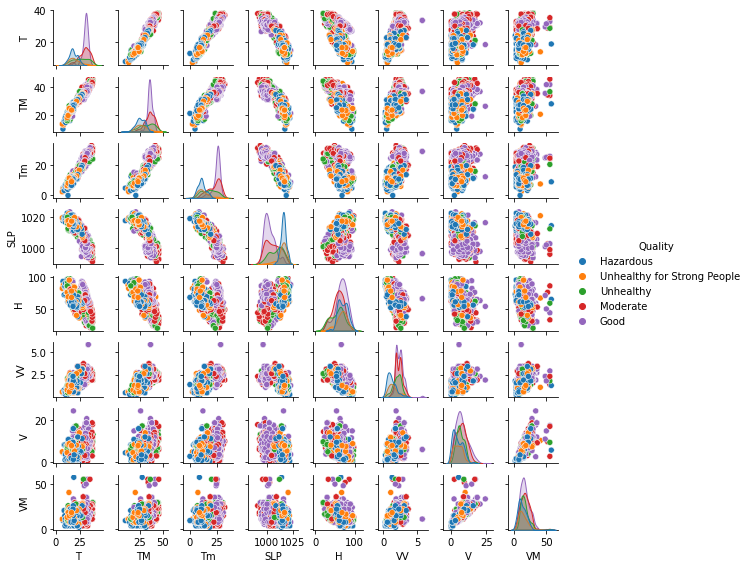

In [10]:
sns.pairplot(categorical_dataframe, hue="Quality", height=1)

In [11]:
Y = df['PM 2.5']
X = df.drop(['PM 2.5'], axis=1)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [18]:
reg = MLPRegressor()

In [19]:
reg.fit(X_train, Y_train)

MLPRegressor()

In [20]:
reg.score(X_train, Y_train)

0.499775463527915

In [21]:
reg.score(X_test, Y_test)

0.43778003168001045

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
cross_val_score(reg, X_train, Y_train, cv=5)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) 

array([0.47738198, 0.50909841, 0.48506871, 0.49821075, 0.43612018])

In [24]:
prediction=reg.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

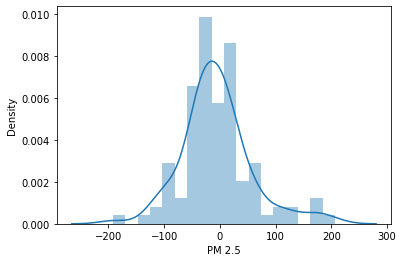

In [25]:
sns.distplot(Y_test-prediction)